In [ ]:
pip install tensorflow

In [3]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import math
from tqdm import tqdm
from tabulate import tabulate

from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

from sklearn import linear_model
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier


In [4]:
import warnings
warnings.simplefilter(action = 'ignore', category= FutureWarning)
warnings.filterwarnings('ignore')

In [92]:
from google.colab import files
uploaded = files.upload()

Saving hepatitis.CSV to hepatitis (1).CSV


In [93]:
# Read the csv dataset
columns = ['Class','AGE','SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER_BIG','LIVER_FIRM','SPLEEN_PALPABLE',
           'SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK_PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY'] #adding column names

import io
data = pd.read_csv(io.BytesIO(uploaded['hepatitis (1).CSV']),names=columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   AGE              155 non-null    int64 
 2   SEX              155 non-null    int64 
 3   STEROID          155 non-null    object
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          155 non-null    object
 6   MALAISE          155 non-null    object
 7   ANOREXIA         155 non-null    object
 8   LIVER_BIG        155 non-null    object
 9   LIVER_FIRM       155 non-null    object
 10  SPLEEN_PALPABLE  155 non-null    object
 11  SPIDERS          155 non-null    object
 12  ASCITES          155 non-null    object
 13  VARICES          155 non-null    object
 14  BILIRUBIN        155 non-null    object
 15  ALK_PHOSPHATE    155 non-null    object
 16  SGOT             155 non-null    object
 17  ALBUMIN          155 non-null    ob

In [94]:
data

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [95]:
# Checking duplicate values if present in the data
duplicate_rows = data[data.duplicated()]
print("Number of duplicate rows :: ", duplicate_rows.shape)

Number of duplicate rows ::  (0, 20)


In [96]:
# Replacing the '?' with blank space
data=data.replace(to_replace="?", value=np.nan)
data

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,NaN,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,NaN,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,NaN,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [97]:
# Check nonnull values
data = data[data.notnull()]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   AGE              155 non-null    int64 
 2   SEX              155 non-null    int64 
 3   STEROID          154 non-null    object
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          154 non-null    object
 6   MALAISE          154 non-null    object
 7   ANOREXIA         154 non-null    object
 8   LIVER_BIG        145 non-null    object
 9   LIVER_FIRM       144 non-null    object
 10  SPLEEN_PALPABLE  150 non-null    object
 11  SPIDERS          150 non-null    object
 12  ASCITES          150 non-null    object
 13  VARICES          150 non-null    object
 14  BILIRUBIN        149 non-null    object
 15  ALK_PHOSPHATE    126 non-null    object
 16  SGOT             151 non-null    object
 17  ALBUMIN          139 non-null    ob

In [98]:
round(((data.isna().sum())*100/155),2)

Class               0.00
AGE                 0.00
SEX                 0.00
STEROID             0.65
ANTIVIRALS          0.00
FATIGUE             0.65
MALAISE             0.65
ANOREXIA            0.65
LIVER_BIG           6.45
LIVER_FIRM          7.10
SPLEEN_PALPABLE     3.23
SPIDERS             3.23
ASCITES             3.23
VARICES             3.23
BILIRUBIN           3.87
ALK_PHOSPHATE      18.71
SGOT                2.58
ALBUMIN            10.32
PROTIME            43.23
HISTOLOGY           0.00
dtype: float64

In [99]:
# Deleting the column PROTIME due to presence of 43.23% of null values in the data
data.drop(['PROTIME'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            155 non-null    int64 
 1   AGE              155 non-null    int64 
 2   SEX              155 non-null    int64 
 3   STEROID          154 non-null    object
 4   ANTIVIRALS       155 non-null    int64 
 5   FATIGUE          154 non-null    object
 6   MALAISE          154 non-null    object
 7   ANOREXIA         154 non-null    object
 8   LIVER_BIG        145 non-null    object
 9   LIVER_FIRM       144 non-null    object
 10  SPLEEN_PALPABLE  150 non-null    object
 11  SPIDERS          150 non-null    object
 12  ASCITES          150 non-null    object
 13  VARICES          150 non-null    object
 14  BILIRUBIN        149 non-null    object
 15  ALK_PHOSPHATE    126 non-null    object
 16  SGOT             151 non-null    object
 17  ALBUMIN          139 non-null    ob

In [101]:
# Converting the quantative variables or features from string to numeric
data['BILIRUBIN'] = data['BILIRUBIN'].astype(float)
data['ALK_PHOSPHATE'] = data['ALK_PHOSPHATE'].astype(float)
data['SGOT'] = data['SGOT'].astype(float)
data['ALBUMIN'] = data['ALBUMIN'].astype(float)
data['SEX'] = data['SEX'].astype(object)
data['ANTIVIRALS'] = data['ANTIVIRALS'].astype(object)
data['HISTOLOGY'] = data['HISTOLOGY'].astype(object)

In [102]:
data.describe()

,Class,AGE,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN
count,155.000000,155.000000,149.000000,126.000000,151.00000,139.000000
mean,1.793548,41.200000,1.427517,105.325397,85.89404,3.817266
std,0.406070,12.565878,1.212149,51.508109,89.65089,0.651523
min,1.000000,7.000000,0.300000,26.000000,14.00000,2.100000
25%,2.000000,32.000000,0.700000,74.250000,31.50000,3.400000
50%,2.000000,39.000000,1.000000,85.000000,58.00000,4.000000
75%,2.000000,50.000000,1.500000,132.250000,100.50000,4.200000
max,2.000000,78.000000,8.000000,295.000000,648.00000,6.400000


Text(0.5, 0, 'BILIRUBIN')

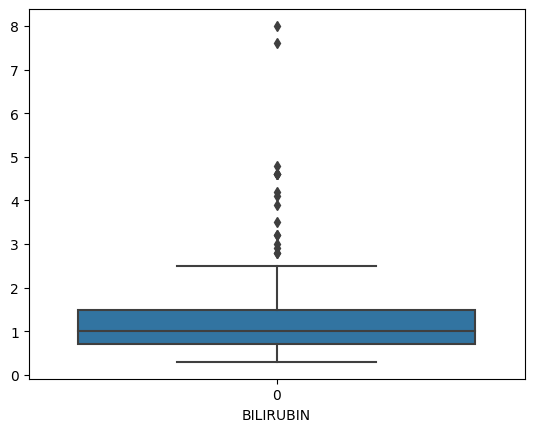

In [103]:
# Ploting boxplot for the features having null value to check its distribution
sns.boxplot(data.BILIRUBIN)
plt.xlabel('BILIRUBIN')

Text(0.5, 0, 'ALK PHOSPHATE')

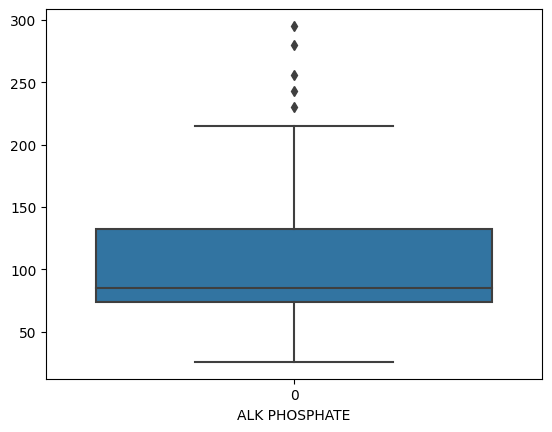

In [104]:
sns.boxplot(data.ALK_PHOSPHATE)
plt.xlabel('ALK PHOSPHATE')

Text(0.5, 0, 'SGOT')

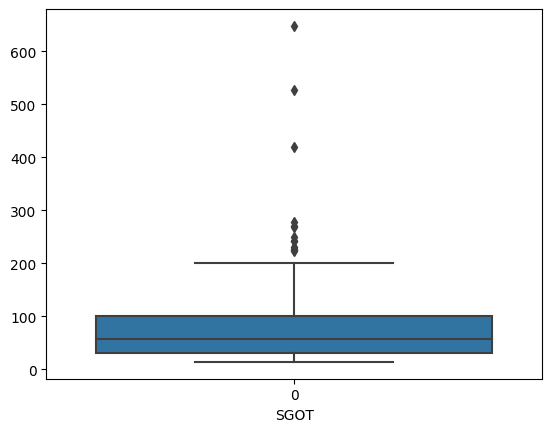

In [105]:
sns.boxplot(data.SGOT)
plt.xlabel('SGOT')

Text(0.5, 0, 'ALBUMIN')

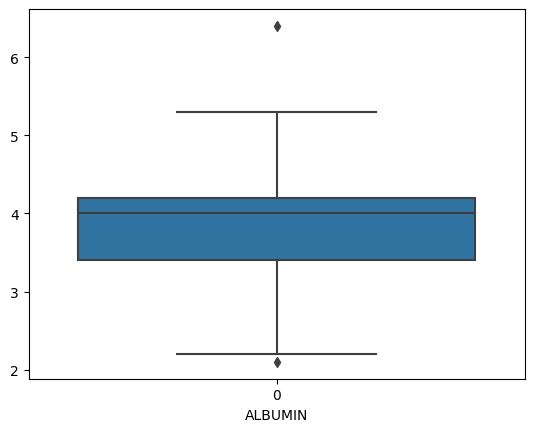

In [107]:
sns.boxplot(data.ALBUMIN)
plt.xlabel('ALBUMIN')

In [108]:
# Replacing the null values of the quantitative variable with column median
data['BILIRUBIN'].fillna(data['BILIRUBIN'].median(),inplace=True)
data['SGOT'].fillna(data['SGOT'].median(),inplace=True)
data['ALBUMIN'].fillna(data['ALBUMIN'].median(),inplace=True)
data['ALK_PHOSPHATE'].fillna(data['ALK_PHOSPHATE'].median(),inplace=True)

In [109]:
round(((data.isna().sum())*100/155),2)

Class              0.00
AGE                0.00
SEX                0.00
STEROID            0.65
ANTIVIRALS         0.00
FATIGUE            0.65
MALAISE            0.65
ANOREXIA           0.65
LIVER_BIG          6.45
LIVER_FIRM         7.10
SPLEEN_PALPABLE    3.23
SPIDERS            3.23
ASCITES            3.23
VARICES            3.23
BILIRUBIN          0.00
ALK_PHOSPHATE      0.00
SGOT               0.00
ALBUMIN            0.00
HISTOLOGY          0.00
dtype: float64

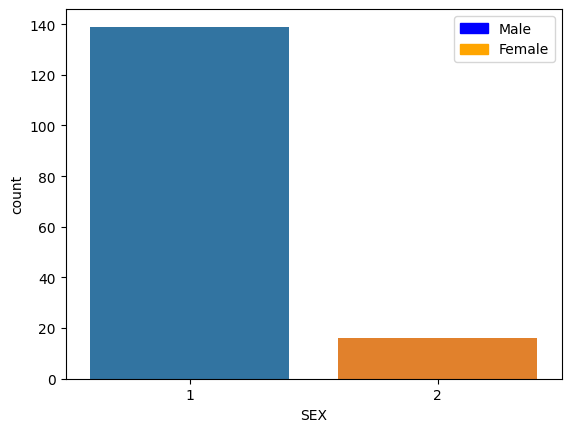

In [110]:
sns.countplot(data,x='SEX')
colors = {'Male':'blue', 'Female':'orange'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)

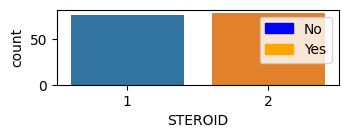

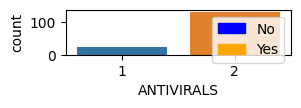

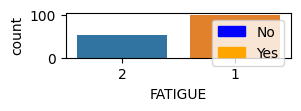

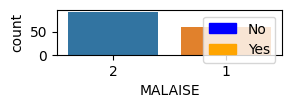

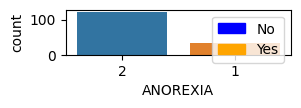

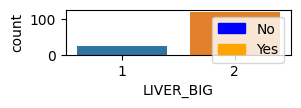

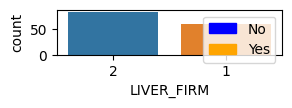

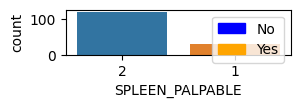

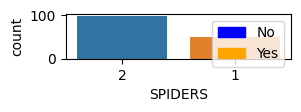

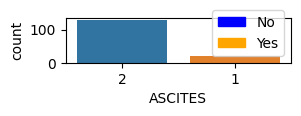

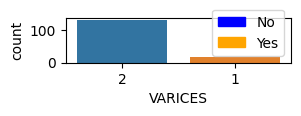

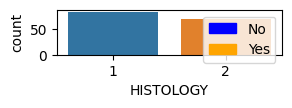

In [111]:
cat_cols =['STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER_BIG','LIVER_FIRM','SPLEEN_PALPABLE',
           'SPIDERS','ASCITES','VARICES','HISTOLOGY']
plt.figure(figsize=(8,8))
for i, col in enumerate(cat_cols):
    plt.subplot(7,2,i+1)
    sns.countplot(data,x=col)
    colors = {'No':'blue', 'Yes':'orange'}
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels)
    plt.show()

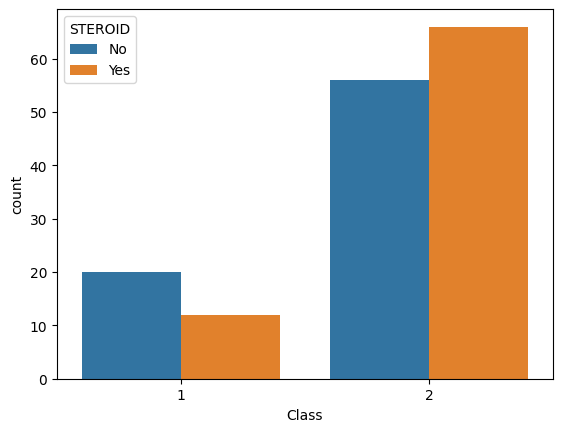

In [112]:
sns.countplot(data,x='Class', hue='STEROID')
plt.legend(list({'No':'1', 'Yes':'2'}.keys()),title='STEROID')

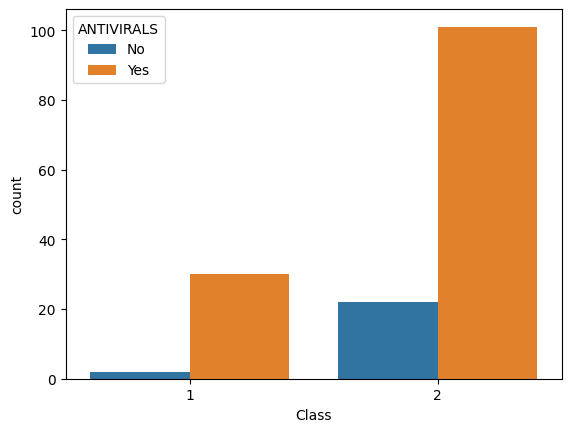

In [113]:
sns.countplot(data,x='Class', hue='ANTIVIRALS')
plt.legend(list({'No':'1', 'Yes':'2'}.keys()),title='ANTIVIRALS')

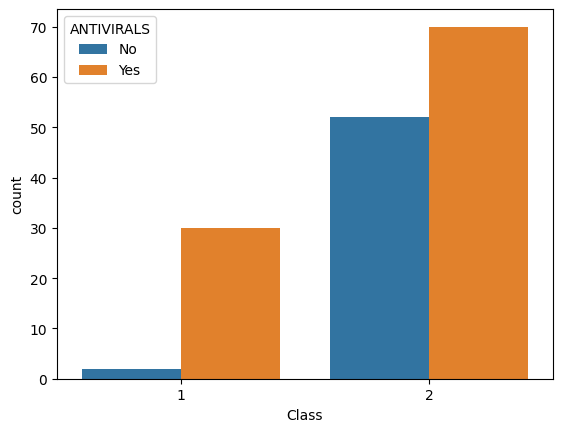

In [114]:
sns.countplot(data,x='Class', hue='FATIGUE')
plt.legend(list({'No':'1', 'Yes':'2'}.keys()),title='ANTIVIRALS')

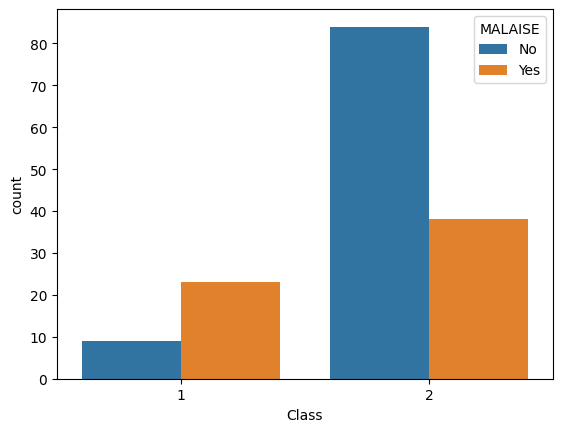

In [115]:
sns.countplot(data,x='Class', hue='MALAISE')
plt.legend(list({'No':'1', 'Yes':'2'}.keys()),title='MALAISE')

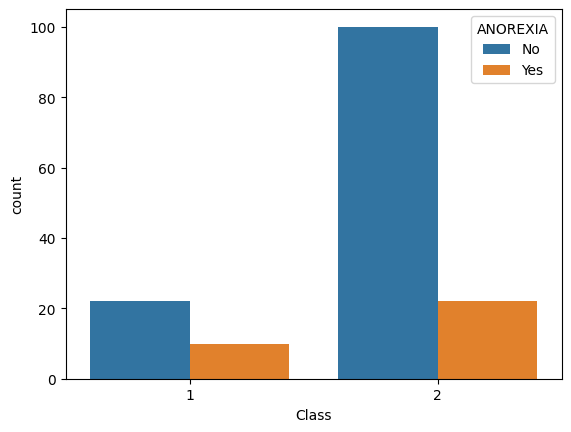

In [116]:
sns.countplot(data,x='Class', hue='ANOREXIA')
plt.legend(list({'No':'1', 'Yes':'2'}.keys()),title='ANOREXIA')

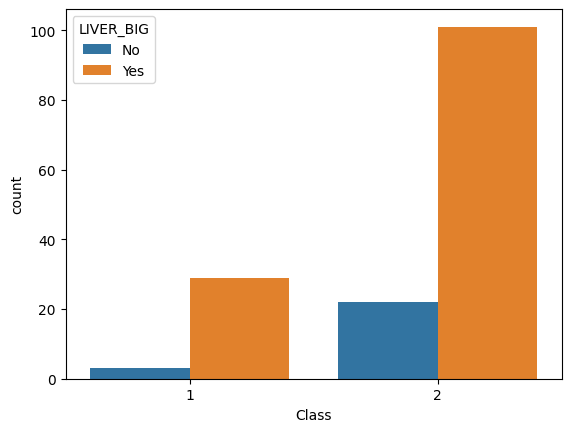

In [49]:
sns.countplot(data,x='Class', hue='LIVER_BIG')
plt.legend(list({'No':'1', 'Yes':'2'}.keys()),title='LIVER_BIG')

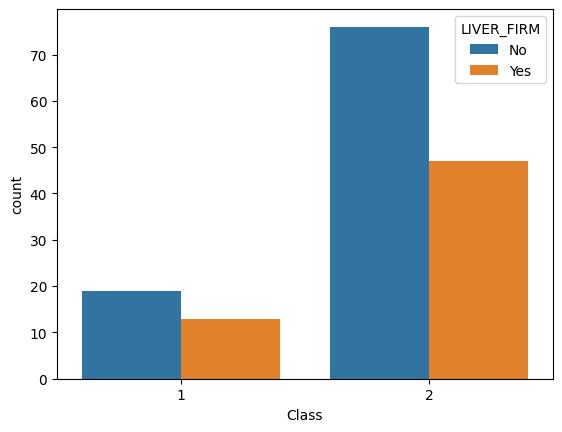

In [50]:
sns.countplot(data,x='Class', hue='LIVER_FIRM')
plt.legend(list({'No':'1', 'Yes':'2'}.keys()),title='LIVER_FIRM')

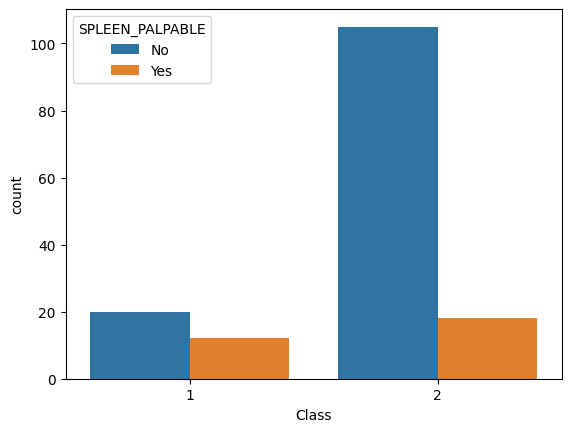

In [51]:
sns.countplot(data,x='Class', hue='SPLEEN_PALPABLE')
plt.legend(list({'No':'1', 'Yes':'2'}.keys()),title='SPLEEN_PALPABLE')

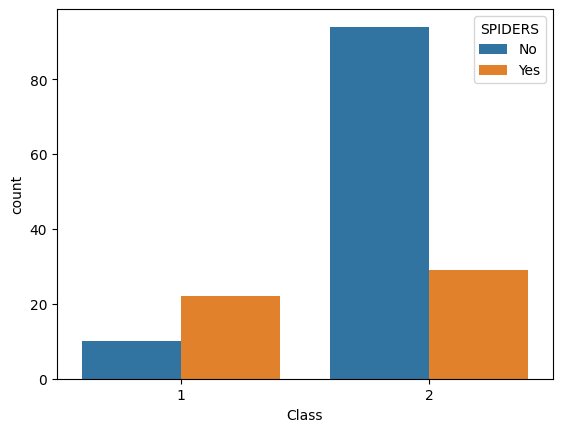

In [52]:
sns.countplot(data,x='Class', hue='SPIDERS')
plt.legend(list({'No':'1', 'Yes':'2'}.keys()),title='SPIDERS')

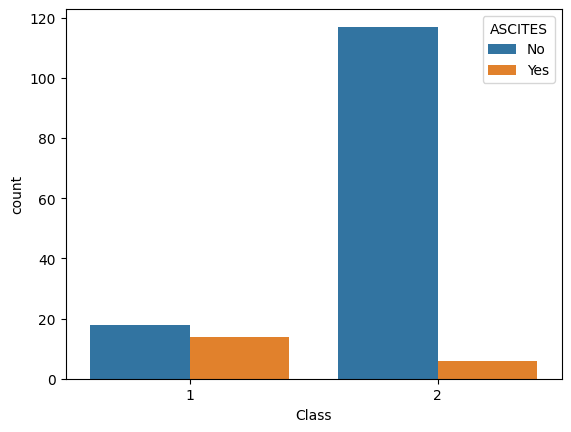

In [53]:
sns.countplot(data,x='Class', hue='ASCITES')
plt.legend(list({'No':'1', 'Yes':'2'}.keys()),title='ASCITES')

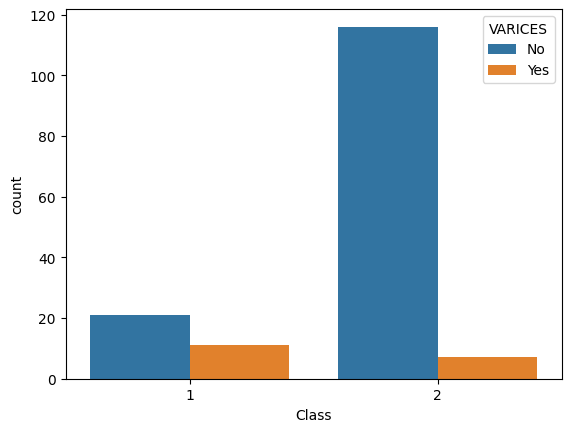

In [54]:
sns.countplot(data,x='Class', hue='VARICES')
plt.legend(list({'No':'1', 'Yes':'2'}.keys()),title='VARICES')

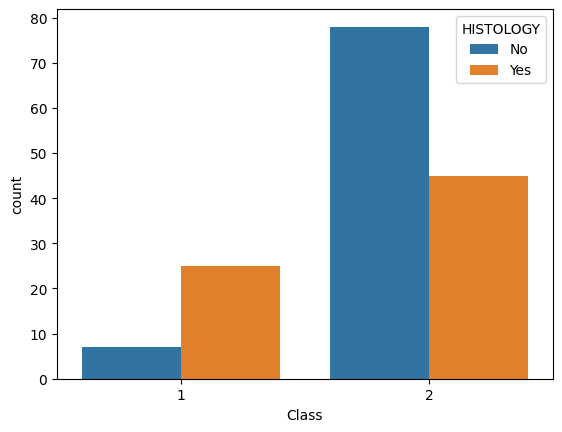

In [55]:
sns.countplot(data,x='Class', hue='HISTOLOGY')
plt.legend(list({'No':'1', 'Yes':'2'}.keys()),title='HISTOLOGY')

In [117]:
# Replacing the remaining null values with column mode in each categorical column
data['STEROID'].fillna(data['STEROID'].mode()[0],inplace=True)
data['FATIGUE'].fillna(data['FATIGUE'].mode()[0],inplace=True)
data['MALAISE'].fillna(data['MALAISE'].mode()[0],inplace=True)
data['ANOREXIA'].fillna(data['ANOREXIA'].mode()[0],inplace=True)
data['LIVER_BIG'].fillna(data['LIVER_BIG'].mode()[0],inplace=True)
data['LIVER_FIRM'].fillna(data['LIVER_FIRM'].mode()[0],inplace=True)
data['SPLEEN_PALPABLE'].fillna(data['SPLEEN_PALPABLE'].mode()[0],inplace=True)
data['SPIDERS'].fillna(data['SPIDERS'].mode()[0],inplace=True)
data['ASCITES'].fillna(data['ASCITES'].mode()[0],inplace=True)
data['VARICES'].fillna(data['VARICES'].mode()[0],inplace=True)
round(((data.isna().sum())*100/155),2)

Class              0.0
AGE                0.0
SEX                0.0
STEROID            0.0
ANTIVIRALS         0.0
FATIGUE            0.0
MALAISE            0.0
ANOREXIA           0.0
LIVER_BIG          0.0
LIVER_FIRM         0.0
SPLEEN_PALPABLE    0.0
SPIDERS            0.0
ASCITES            0.0
VARICES            0.0
BILIRUBIN          0.0
ALK_PHOSPHATE      0.0
SGOT               0.0
ALBUMIN            0.0
HISTOLOGY          0.0
dtype: float64

In [118]:
# To check whether the dataset is balaced or not
data['Class'].value_counts()

2    123
1     32
Name: Class, dtype: int64

In [119]:
# Oversampling the minority category

from sklearn.utils import resample

#To keep original data as it is to use the same for later
new_data = data.copy()

#Getting seperated data with 1 and 0 status.
df_majority = new_data[new_data.Class==2]
df_minority = new_data[new_data.Class==1]

#Here we are upsampling the Minority Class Data Points.
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=123,random_state=123)
df = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:\n",df.Class.value_counts())

Upsampled data:
 2    123
1    123
Name: Class, dtype: int64


In [120]:
X = df.drop(columns='Class')
y = df['Class']

In [121]:
# Splitting the data into train and test dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((196, 18), (50, 18), (196,), (50,))

In [123]:
# converting the categorical variables into array of the numerical data
from sklearn.preprocessing import OneHotEncoder

cat_cols =['SEX','STEROID','ANTIVIRALS','FATIGUE','MALAISE','ANOREXIA','LIVER_BIG','LIVER_FIRM','SPLEEN_PALPABLE',
           'SPIDERS','ASCITES','VARICES','HISTOLOGY']
ohc = OneHotEncoder(handle_unknown='ignore')
ohc.fit(np.array(X_train[cat_cols]))
X_train_ohc = ohc.transform(np.array(X_train[cat_cols])).toarray()
X_test_ohc = ohc.transform(np.array(X_test[cat_cols])).toarray()
X_train_ohc.shape, X_test_ohc.shape

((196, 26), (50, 26))

In [124]:
# standardizing the numerical data features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[['AGE','BILIRUBIN','ALK_PHOSPHATE','SGOT','ALBUMIN']])
X_train_std = scaler.transform(X_train[['AGE','BILIRUBIN','ALK_PHOSPHATE','SGOT','ALBUMIN']])
X_test_std = scaler.transform(X_test[['AGE','BILIRUBIN','ALK_PHOSPHATE','SGOT','ALBUMIN']])
X_train_std.shape, X_test_std.shape

((196, 5), (50, 5))

In [125]:
X_preprocessed_train = pd.concat([pd.DataFrame(X_train_ohc),pd.DataFrame(X_train_std)],axis=1,ignore_index=True)
X_preprocessed_test = pd.concat([pd.DataFrame(X_test_ohc),pd.DataFrame(X_test_std)],axis=1,ignore_index=True)
X_preprocessed_train.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,-0.336262,-0.481567,-0.376027,-0.766967,0.498495
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.715646,-0.481567,-0.484348,-0.574283,0.942609
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,-1.321177,-0.603044,-0.159386,-0.488646,0.202419
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,-0.992872,3.770109,-0.376027,0.100110,-2.166188
4,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.566578,0.611721,1.140461,-0.178211,-1.870112


In [126]:
# Logistic Regression(LR)
lr = LogisticRegression()
clf = lr.fit(X_preprocessed_train,y_train)
predictions = clf.predict(X_preprocessed_test)
predictions

array([2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 1, 2])

              precision    recall  f1-score   support

           1       0.77      0.80      0.78        25
           2       0.79      0.76      0.78        25

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



[Text(50.722222222222214, 0.5, 'Actual Values'),
 Text(0.5, 23.52222222222222, 'Predicted Values')]

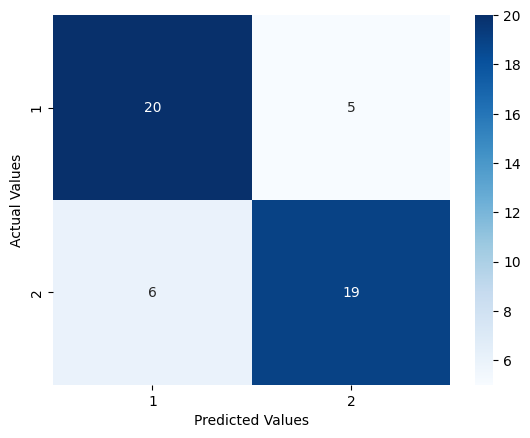

In [127]:
#Classification Results
print(classification_report(y_test,predictions))
ax = sns.heatmap(confusion_matrix(y_test,predictions,labels=[1,2]),cmap='Blues',annot=True,xticklabels=[1,2],yticklabels=[1,2])
ax.set(ylabel="Actual Values", xlabel="Predicted Values")

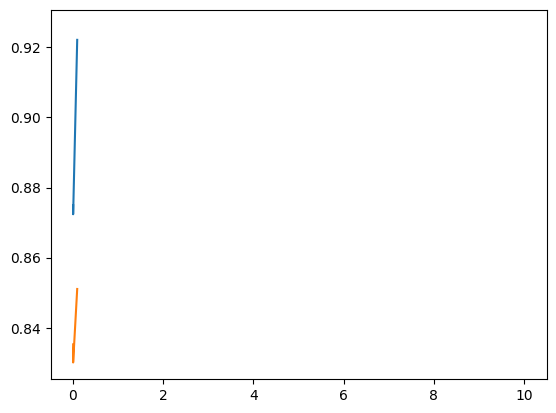

Best parameter values: {'solver': 'lbfgs', 'penalty': 'l2', 'class_weight': 'balanced', 'C': 10}
Best f1-score: 0.8612457999177705


In [128]:
#Cross Validation using RadomizedsearchCV
lr_cv = LogisticRegression(random_state=42)
params = {
    'C': [0.001,0.01,0.1,1,10],
    'penalty': ['l1','l2','elasticnet',None],
    'class_weight': ['balanced', None],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],

}
clf_cv = RandomizedSearchCV(lr_cv,params,scoring='f1_macro',cv=5,return_train_score=True)
clf_cv.fit(X_preprocessed_train,y_train)
train_scores = clf_cv.cv_results_['mean_train_score']
cv_scores = clf_cv.cv_results_['mean_test_score']
param_C = clf_cv.cv_results_['param_C']
plt.plot(param_C,train_scores)
plt.plot(param_C,cv_scores)
plt.show()
print("Best parameter values: {}".format(clf_cv.best_params_))
print("Best f1-score: {}".format(clf_cv.best_score_))

In [129]:
lr_best = LogisticRegression(random_state=42,solver='lbfgs',penalty='l2',class_weight='balanced',C=10)
lr_best.fit(X_preprocessed_train,y_train)

predictions = lr_best.predict(X_preprocessed_test)

              precision    recall  f1-score   support

           1       0.77      0.80      0.78        25
           2       0.79      0.76      0.78        25

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



[Text(50.722222222222214, 0.5, 'Actual Values'),
 Text(0.5, 23.52222222222222, 'Predicted Values')]

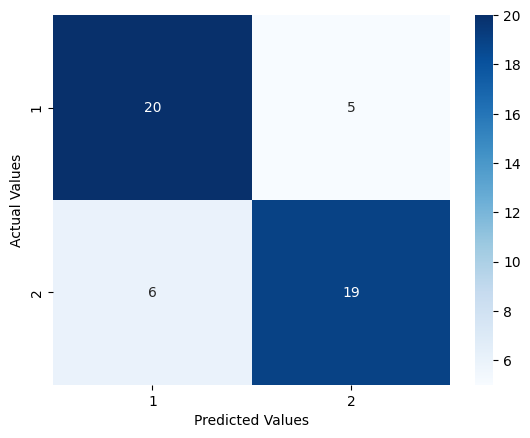

In [130]:
print(classification_report(y_test,predictions))
ax = sns.heatmap(confusion_matrix(y_test,predictions,labels=[1,2]),cmap='Blues',annot=True,xticklabels=[1,2],yticklabels=[1,2])
ax.set(ylabel="Actual Values", xlabel="Predicted Values")

In [131]:
feature_data = pd.DataFrame()
feature_data['features'] = X_preprocessed_train.columns
feature_data['weights'] = lr_best.coef_[0]
feature_data

,features,weights
0,0,-2.942119
1,1,2.941290
2,2,-0.711183
3,3,0.710354
4,4,-0.078542
5,5,0.077713
6,6,-0.812957
7,7,0.812128
8,8,-0.564713
9,9,0.563883


In [133]:
# Decision Tree(DT)
dt = DecisionTreeClassifier()
dt.fit(X_preprocessed_train,y_train)
predictions_dt = dt.predict(X_preprocessed_test)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



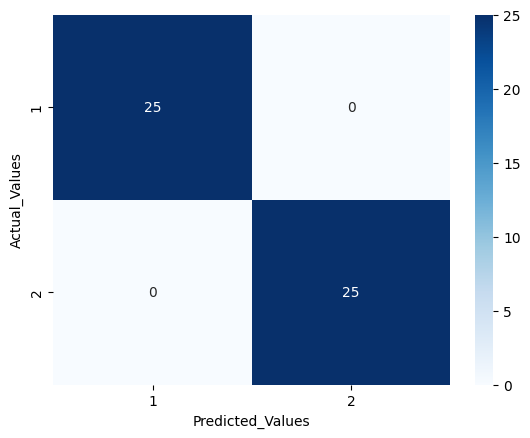

In [134]:
print(classification_report(y_test,predictions_dt))
ax = sns.heatmap(confusion_matrix(y_test,predictions_dt,labels=[1,2]),annot=True,cmap='Blues',xticklabels=[1,2],yticklabels=[1,2])
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

In [135]:
# splitting train dataset for cross validation
X_tr,X_cv,y_tr,y_cv = train_test_split(X_train,y_train,test_size=0.2,stratify=y_train)
X_tr.shape, y_tr.shape, X_cv.shape, y_cv.shape

((156, 18), (156,), (40, 18), (40,))

In [136]:
# converting the categorical variables into array of the numerical data
X_tr_cat = ohc.transform(np.array(X_tr[cat_cols])).toarray()
X_cv_cat = ohc.transform(np.array(X_cv[cat_cols])).toarray()
X_tr_cat.shape, X_cv.shape

((156, 26), (40, 18))

In [137]:
# standardizing the numerical data features
X_tr_std  = scaler.transform(X_tr[['AGE','BILIRUBIN','ALK_PHOSPHATE','SGOT','ALBUMIN']])
X_cv_std  = scaler.transform(X_cv[['AGE','BILIRUBIN','ALK_PHOSPHATE','SGOT','ALBUMIN']])
X_tr_std.shape, X_cv_std.shape

((156, 5), (40, 5))

In [138]:
# concatinating to form the complete dataset
X_tr = pd.concat([pd.DataFrame(X_tr_cat),pd.DataFrame(X_tr_std)],axis=1,ignore_index=True)
X_cv = pd.concat([pd.DataFrame(X_cv_cat),pd.DataFrame(X_cv_std)],axis=1,ignore_index=True)
X_tr.shape,X_cv.shape

((156, 31), (40, 31))

In [139]:
y_tr.value_counts()

1    78
2    78
Name: Class, dtype: int64

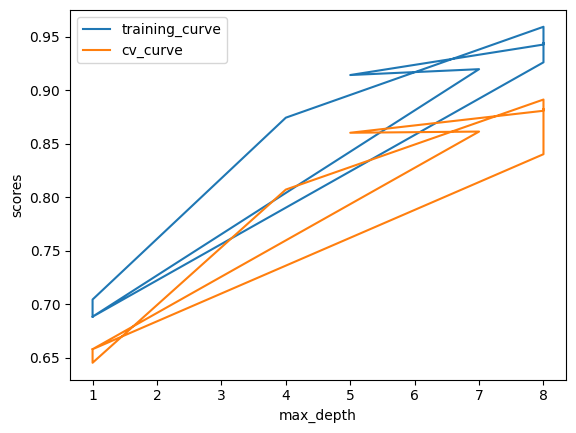

Best hyper parameters: {'min_samples_split': 4, 'min_samples_leaf': 1, 'max_depth': 8, 'criterion': 'entropy'}
Best score: 0.8912232786390708


In [140]:
#Cross validation
clf = DecisionTreeClassifier(class_weight='balanced')
params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [i for i in range(1,11)],
    'min_samples_split': [i for i in range(2,11)],
    'min_samples_leaf': [i for i in range(1,11)],
}
clf_cv = RandomizedSearchCV(clf,params,scoring='f1_macro',cv=5,return_train_score=True)
clf_cv.fit(X_preprocessed_train,y_train)

train_score = clf_cv.cv_results_['mean_train_score']
test_score = clf_cv.cv_results_['mean_test_score']
n_neigh = clf_cv.cv_results_['param_max_depth']

plt.plot(n_neigh,train_score,label='training_curve')
plt.plot(n_neigh,test_score,label='cv_curve')
plt.xlabel('max_depth')
plt.ylabel('scores')
plt.legend()
plt.show()

print("Best hyper parameters: {}".format(clf_cv.best_params_))
print("Best score: {}".format(clf_cv.best_score_))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        20
           2       1.00      0.80      0.89        20

    accuracy                           0.90        40
   macro avg       0.92      0.90      0.90        40
weighted avg       0.92      0.90      0.90        40



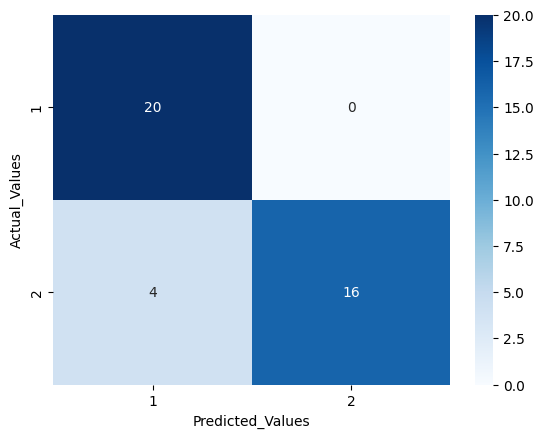

In [141]:
#Training the model with best hyper parameters
dt_clf = DecisionTreeClassifier(class_weight='balanced',min_samples_split=4,min_samples_leaf=1,max_depth=8,criterion='entropy')
dt_clf.fit(X_tr,y_tr)

y_predicted = dt_clf.predict(X_cv)
print(classification_report(y_cv,y_predicted))
ax = sns.heatmap(confusion_matrix(y_cv,y_predicted,labels=[1,2]),annot=True,cmap='Blues',xticklabels=[1,2],yticklabels=[1,2])
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

In [142]:
# Random Forest(RF)
rfc = RandomForestClassifier()
crf=rfc.fit(X_preprocessed_train,y_train)
prediction_rf = crf.predict(X_preprocessed_test)

              precision    recall  f1-score   support

           1       0.89      1.00      0.94        25
           2       1.00      0.88      0.94        25

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50



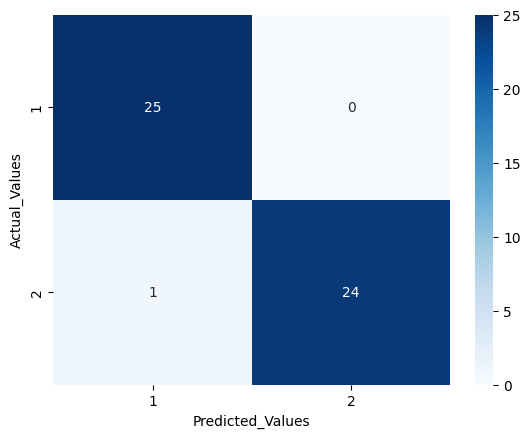

In [143]:
print(classification_report(y_test,prediction_rf))
ax = sns.heatmap(confusion_matrix(y_test,predictions,labels=[1,2]),annot=True,cmap='Blues',xticklabels=[1,2],yticklabels=[1,2])
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

In [144]:
# K-Nearest Neighbour(KNN)
knn = KNeighborsClassifier()
knn.fit(X_preprocessed_train,y_train)

predictions_knn = knn.predict(X_preprocessed_test)
print(classification_report(y_test,predictions_knn))


              precision    recall  f1-score   support

           1       0.76      0.88      0.81        25
           2       0.86      0.72      0.78        25

    accuracy                           0.80        50
   macro avg       0.81      0.80      0.80        50
weighted avg       0.81      0.80      0.80        50



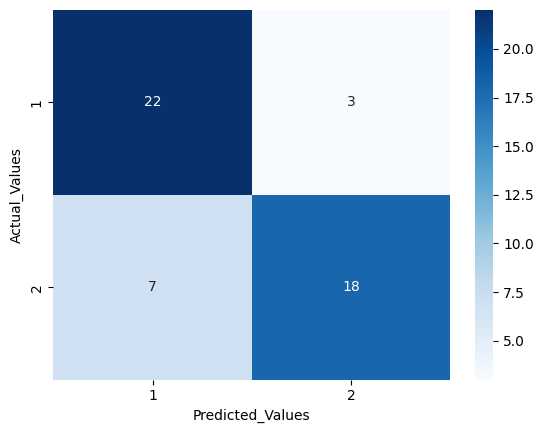

In [145]:
ax = sns.heatmap(confusion_matrix(y_test,predictions_knn,labels=[1,2]),annot=True,cmap='Blues',xticklabels=[1,2],yticklabels=[1,2])
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

              precision    recall  f1-score   support

           1       0.83      0.76      0.79        25
           2       0.78      0.84      0.81        25

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



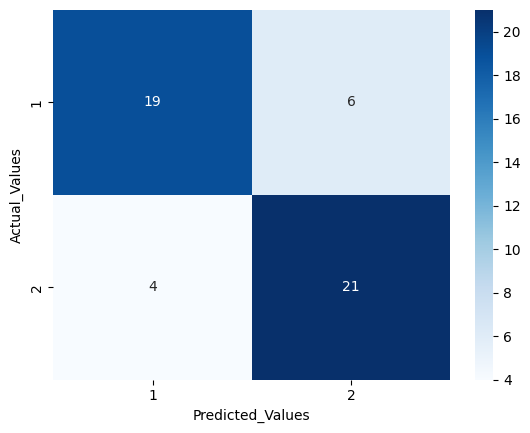

In [146]:
# Naive Bayes(NB)
bnb = BernoulliNB()
bnb.fit(X_preprocessed_train,y_train)

predictions_bnb = bnb.predict(X_preprocessed_test)
print(classification_report(y_test,predictions_bnb))
ax = sns.heatmap(confusion_matrix(y_test,predictions_bnb,labels=[1,2]),annot=True,cmap='Blues',xticklabels=[1,2],yticklabels=[1,2])
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()

              precision    recall  f1-score   support

           1       0.86      0.96      0.91        25
           2       0.95      0.84      0.89        25

    accuracy                           0.90        50
   macro avg       0.91      0.90      0.90        50
weighted avg       0.91      0.90      0.90        50



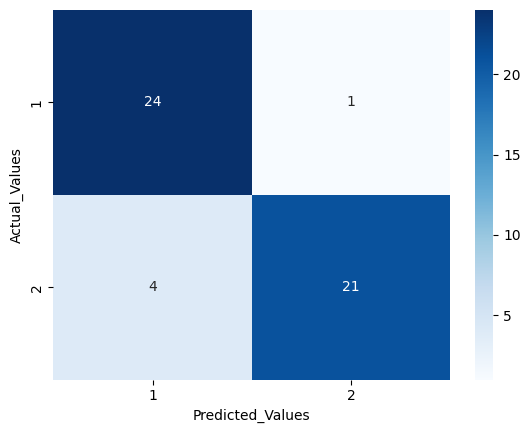

In [147]:
# AdaBoost Algorithm
ada = AdaBoostClassifier()
ada.fit(X_preprocessed_train,y_train)
predictions_ada = ada.predict(X_preprocessed_test)

print(classification_report(y_test,predictions_ada))
ax = sns.heatmap(confusion_matrix(y_test,predictions_ada,labels=[1,2]),annot=True,cmap='Blues',xticklabels=[1,2],yticklabels=[1,2])
ax.set(xlabel='Predicted_Values',ylabel='Actual_Values')
plt.show()